by Jacinto Paulo Neto

# BOLTZMANN EQUATION FOR WIMP DARK MATTER

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import kn
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}') 

In [2]:
def s(x):
    return (2 * np.pi**2 / 45) * gstar * mchi**3 * x**-3

def H(x):
    return np.sqrt(np.pi**2 * gstar / 90) * mchi**2 / (Mp * x**2)

def Yeq(x):
    return (45 / (4 * np.pi**4)) * (gchi /gstar) * x**2 * kn(2, x)

def boltzmann_eq(x, Y, sigmav):
    Yeqx = Yeq(x)
    return -s(x) * sigmav / (x * H(x)) * (Y**2 - Yeqx**2)

$\Omega_{\textrm{DM}}h^2 = 2.74385 \times 10^8 \frac{m_{\textrm{DM}}}{\textrm{GeV}}  Y_{\textrm{DM}}$

In [28]:
def YDMPlanck(mchi): # DM in GeV
    return (0.12/2.74385)*(1e-8/mchi)

YDMPlanck(100)

4.373416914189916e-12

In [3]:
# Constants
mchi = 100.0  # GeV
Mp = 2.435e18  # 2.435x10^18 GeV
gchi = 4;  gstar = 106.8 #;g_star_s = 106.8

In [40]:
sigmav_val = [1.8e-10,1.8e-9, 1.8e-8] # GeV^{-2}

xinit = 1e-2; xend = 1e4
Y0 = Yeq(xinit)  

xval = np.logspace(np.log10(xinit), np.log10(xend), 10000)
solutions = {}

for sigmav in sigmav_val:
    sol = solve_ivp(boltzmann_eq, [xinit, xend], [Y0], args=(sigmav,), dense_output=True, method='BDF', atol=1e-12, rtol=1e-12)
    Yval = sol.sol(xval)[0]
    solutions[sigmav] = Yval


<Figure size 640x480 with 0 Axes>

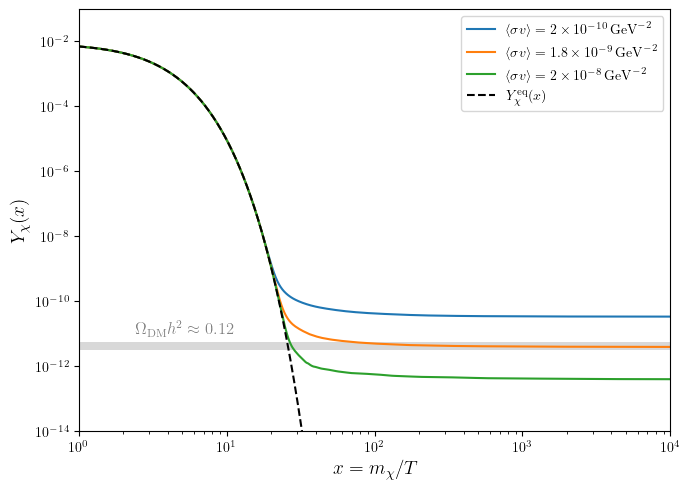

In [48]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(7,5), tight_layout=True);

for sigmav in sigmav_val:
    if(sigmav == 1.8e-10):
        plt.plot(xval, solutions[sigmav], label=r'$\langle \sigma v \rangle =2\times 10^{-10} \, {\rm GeV}^{-2}$')
    if(sigmav == 1.8e-9):
        plt.plot(xval, solutions[sigmav], label=r'$\langle \sigma v \rangle =1.8\times 10^{-9} \, {\rm GeV}^{-2}$')
    if(sigmav == 1.8e-8):
        plt.plot(xval, solutions[sigmav], label=r'$\langle \sigma v \rangle =2\times 10^{-8} \, {\rm GeV}^{-2}$')

plt.plot(xval, Yeq(xval), label=r'$Y_\chi^{\rm eq}(x)$', linestyle='--', color='black')
#plt.axhline(y=YDMPlanck(100), color='r', linestyle='-')
fig.text(0.2, 0.32, r"$\Omega_{\textrm{DM}} h^2 \approx 0.12$", fontsize=12, color='gray')
plt.axhspan(YDMPlanck(100)+1.2e-12, YDMPlanck(100)-1.2e-12, facecolor ='gray', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$x = m_\chi / T$', fontsize=14)
plt.ylabel(r'$Y_\chi(x)$',fontsize=14)
plt.xlim(1,1e4)
plt.ylim(1e-14,1e-1)
plt.legend()
plt.savefig('WIMPDM-BEQ.pdf')
plt.show()